In [25]:
import numpy as np
import matplotlib.pyplot as plot
from scipy.stats import multivariate_normal
import pandas as pd


np.random.seed(0)

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)
a = np.dstack((x, y))

In [26]:
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')

In [27]:
def lda(data_to_predict, mean_mat, inv_p_cov, class_prior):
    data_to_predict_flat = data_to_predict.reshape(data_to_predict.shape[0], -1).T
    disc_value = np.zeros((10, data_to_predict.shape[0]))
    
    for i, mean_vec in enumerate(mean_mat.T):
        mean_vec_flat = mean_vec.ravel()
        a1 = np.dot(inv_p_cov, mean_vec_flat) 
        a2 = 0.5 * np.dot(mean_vec_flat.T, a1) 
        disc_value[i, :] = np.dot(a1.T, data_to_predict_flat) - a2 + np.log(class_prior[i])
            
    predict = np.argmax(disc_value, axis=0)
    return predict

In [34]:
def qda(data_to_predict, mean_mat, inv_cov, class_prior):
    data_to_predict_flat = data_to_predict.reshape(data_to_predict.shape[0], -1).T
    disc_value = np.zeros((10, data_to_predict.shape[0]))
    
    for i, mean_vec in enumerate(mean_mat.T):
        mean_vec_flat = mean_vec.ravel()
        diff = data_to_predict_flat - mean_vec_flat[:, np.newaxis]
        trash, ln = np.linalg.slogdet(inv_cov[i])
        disc_value[i, :] = (-0.5 * np.sum(np.dot(diff.T, inv_cov[i]) * diff.T, axis=1)) + (-0.5 * ln + np.log(class_prior[i]))
    
    predict = np.argmax(disc_value, axis=0)
    return predict

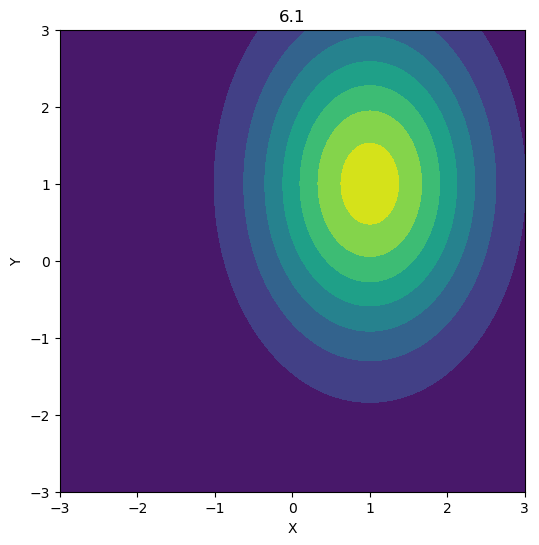

In [29]:
#Question 6.1
b = np.array([1, 1])
c = np.array([[1, 0], [0, 2]])

randvar = multivariate_normal(b, c)
zed = randvar.pdf(a)

plot.figure(figsize=(6,6))
plot.contourf(x, y, zed)
plot.title('6.1')
plot.xlabel('X')
plot.ylabel('Y')
plot.show()

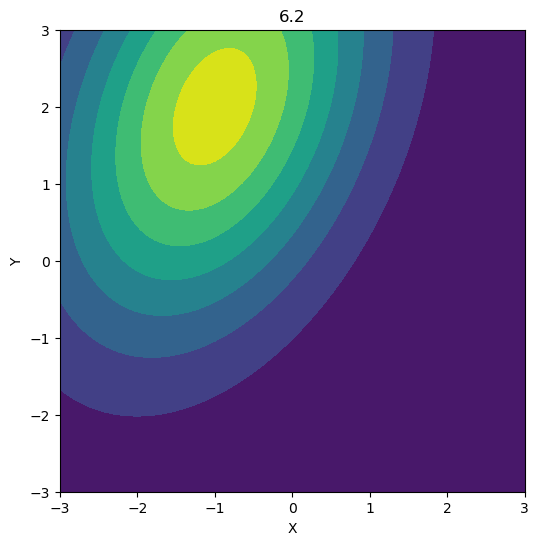

In [30]:
#Question 6.2
b = np.array([-1, 2])
c = np.array([[2, 1], [1, 4]])

randvar = multivariate_normal(b, c)
zed = randvar.pdf(a)

plot.figure(figsize=(6,6))
plot.contourf(x, y, zed)
plot.title('6.2')
plot.xlabel('X')
plot.ylabel('Y')
plot.show()

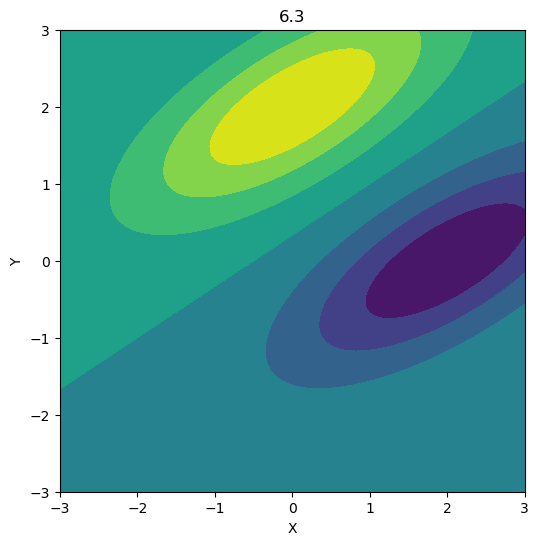

In [31]:
#Question 6.3
b1 = np.array([0, 2])
b2 = np.array([2, 0])
c1 = c2 = np.array([[2, 1], [1, 1]])

randvar1 = multivariate_normal(b1, c1)
randvar2 = multivariate_normal(b2, c2)
zed = randvar1.pdf(a) - randvar2.pdf(a)

plot.figure(figsize=(6,6))
plot.contourf(x, y, zed)
plot.title('6.3')
plot.xlabel('X')
plot.ylabel('Y')
plot.show()

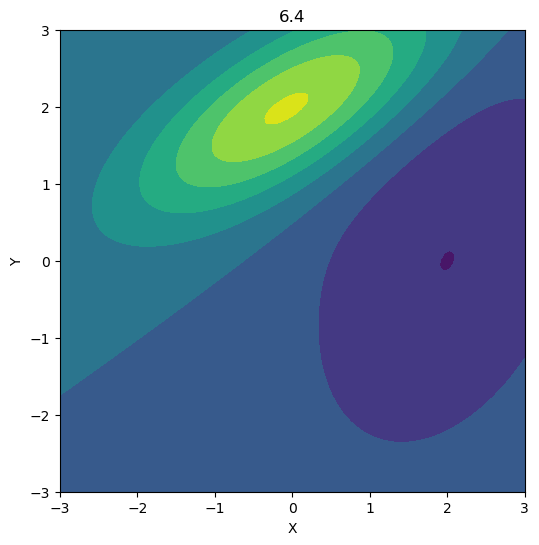

In [32]:
#Question 6.4
c2 = np.array([[2, 1], [1, 4]])

randvar2 = multivariate_normal(b2, c2)
zed = randvar1.pdf(a) - randvar2.pdf(a)

plot.figure(figsize=(6,6))
plot.contourf(x, y, zed)
plot.title('6.4')
plot.xlabel('X')
plot.ylabel('Y')
plot.show()

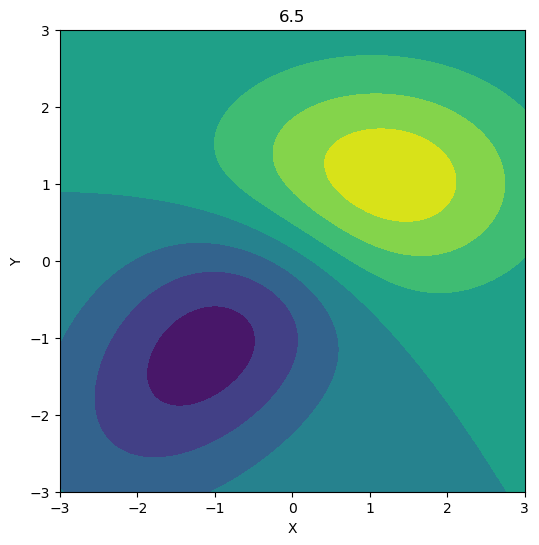

In [33]:
#Question 6.5
b1 = np.array([1, 1])
b2 = np.array([-1, -1])
c1 = np.array([[2, 0], [0, 1]])
c2 = np.array([[2, 1], [1, 2]])

randvar1 = multivariate_normal(b1, c1)
randvar2 = multivariate_normal(b2, c2)
zed = randvar1.pdf(a) - randvar2.pdf(a)

plot.figure(figsize=(6,6))
plot.contourf(x, y, zed)
plot.title('6.5')
plot.xlabel('X')
plot.ylabel('Y')
plot.show()

X1:
 [ 8.29215704  4.20047163  5.93621395  9.7226796   8.60267397  0.06816636
  5.85026525  2.54592838  2.69034344  4.23179551  3.43213071  7.36282052
  5.28311318  3.36502505  4.3315897   4.00102298  7.48223722  2.38452521
  3.9392031   0.43771278 -4.65896945  4.96085579  5.5933086   0.77350494
  9.80926387 -1.36309702  3.13727555  2.43844845  7.59833764  7.40807631
  3.46484228  4.13448756  0.33664276 -2.9423894   1.95626355  3.46904691
  6.69087204  6.60713955  1.83801955  2.09309175 -0.1456589  -1.26005381
 -2.11881057  8.85232619  1.47104345  1.6857771  -0.75838608  5.33247107
 -1.84169354  2.36177916  0.31360032  4.16070749  1.46758459 -0.54189655
  2.91545331  4.28499561  3.19955167  3.90741569  1.09703372  1.9117765
  0.98261866  1.92134052  0.56056115 -2.17884781  3.53227843  1.79465719
 -1.89059504  4.38834677  0.27810491  3.15583619  5.18727169  3.38694873
  6.41820205 -0.70447746  4.20702492  0.94556973  0.38760855  1.26345101
  2.0653424   3.16849603 -0.49544952  5.7024794

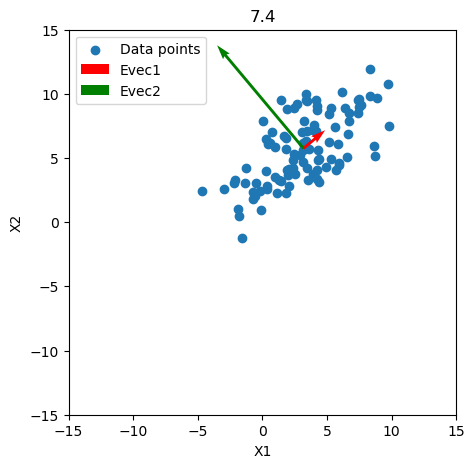

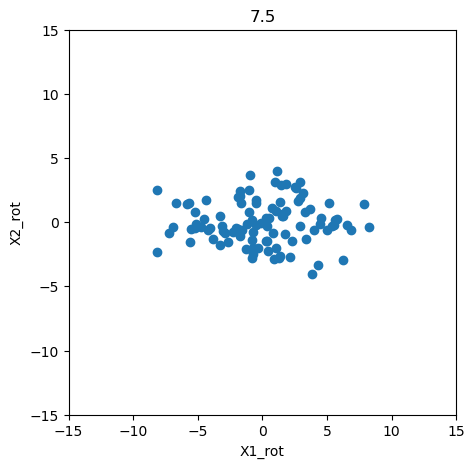

In [10]:
#Question 7
np.random.seed(0)

n = 100
X1_mu = 3
X1_sigma = 3
X2_mu = 4
X2_sigma = 2
a = 0.5

X1 = np.random.normal(X1_mu, X1_sigma, n)
print("X1:\n", X1, "\n\n")
X2 = a * X1 + np.random.normal(X2_mu, X2_sigma, n)
print("X2:\n", X2, "\n\n")
X = np.stack((X1, X2), axis=1)
print("X:\n", X, "\n\n")

print("X[:,0]:\n", X[:,0], "\n\n")
print("X[:,1]:\n", X[:,1], "\n\n")



mean = np.mean(X, axis=0)
print("Mean:\n", mean, "\n")

cov = np.cov(X, rowvar=False)
print("Covariance:\n", cov, "\n")

evals, evecs = np.linalg.eig(cov)
print("Eigenvalues:\n", evals, "\n")
print("Eigenvectors:\n", evecs, "\n")



plot.figure(figsize=(5,5))
plot.scatter(X[:,0], X[:,1], label='Data points')

plot.quiver(mean[0], mean[1], evecs[0,0], evecs[1,0], color='red', scale=evals[0], label='Evec1')
plot.quiver(mean[0], mean[1], evecs[0,1], evecs[1,1], color='green', scale=evals[1], label='Evec2')

plot.xlim(-15, 15)
plot.ylim(-15, 15)

plot.xlabel('X1')
plot.ylabel('X2')

plot.title('7.4')

plot.legend()
plot.show()



X_rot = evecs.T @ (X - mean).T
X_rot = X_rot.T

plot.figure(figsize=(5,5))
plot.scatter(X_rot[:,0], X_rot[:,1])

plot.xlim(-15, 15)
plot.ylim(-15, 15)

plot.xlabel('X1_rot')
plot.ylabel('X2_rot')

plot.title('7.5')
plot.show()

In [37]:
#Question 8
data_npz = np.load('data/mnist-data-hw3.npz')
train_data = data_npz['training_data']
train_labels = data_npz['training_labels']

mean = {}
covariance = {}

for i in range(0,10):
    num_data = train_data[train_labels == i]
    
    l2 = np.linalg.norm(num_data, axis=1) + 0.0001

    num_data = num_data / l2[:, np.newaxis]
    num_data = num_data.reshape(num_data.shape[0], -1)
    
    mean[i] = np.mean(num_data, axis=0)
    covariance[i] = np.cov(num_data, rowvar=False)

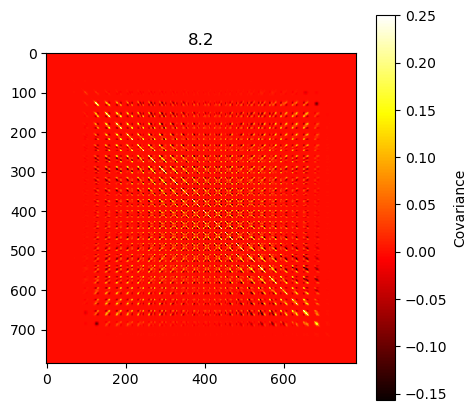

In [38]:
covariance_matrix = covariance[0]

# Visualize the covariance matrix
plot.figure(figsize=(5, 5))
plot.imshow(covariance_matrix, cmap='hot', interpolation='nearest')
plot.title('8.2')
plot.colorbar(label='Covariance')
plot.show()

In [52]:
#Question 8 LDA Working
data_npz = np.load('data/mnist-data-hw3.npz')
train_data = data_npz['training_data']
train_labels = data_npz['training_labels']

mean_dict = {}
cov_dict = {}

for j in range(0,10):
    num_data = train_data[train_labels == j]
    l2 = np.linalg.norm(num_data, axis=1) + 0.0001
    num_data = num_data / l2[:, np.newaxis]
    num_data = num_data.reshape(num_data.shape[0], -1)
    mean_dict[j] = np.mean(num_data, axis=0)
    cov_dict[j] = np.cov(num_data, rowvar=False)
    
mean_mat = np.array(list(mean_dict.values())).T
p_cov = np.mean(list(cov_dict.values()), axis=0)
p_cov += 0.000001 * np.eye(p_cov.shape[0])

class_prior = np.array([np.mean(train_labels == i) for i in range(0,10)]) 

val_indicies = np.random.choice(len(train_data), size=10000, replace=False)
val_data = train_data[val_indicies]
val_label = train_labels[val_indicies]

err_rates = []

train_size = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for i in train_size:
    sub_indicies = np.random.choice(len(train_data), size=i, replace=False)
    sub_data = train_data[sub_indicies]
    sub_label = train_labels[sub_indicies]
    sub_mean_mat = np.array([np.mean(sub_data[sub_label == i], axis=0) for i in range(0,10)]).T
    
    sub_cov = []
    for j in range(0,10):
        data_label = sub_data[sub_label == j]
        if data_label.ndim == 2:
            sub_cov.append(np.cov(data_label, rowvar=False))
        else:
            sub_cov.append(p_cov)
    sub_cov = np.array(sub_cov)
    sub_inv_p_cov = np.linalg.inv(np.mean(sub_cov, axis=0) + 0.000001 * np.eye(sub_cov.shape[1]))
    sub_val_predict = lda(val_data, sub_mean_mat, sub_inv_p_cov, class_prior)

    sub_err_rate = 1 - np.sum(sub_val_predict == val_label) / len(val_label)
    err_rates.append(sub_err_rate)

Err Rate:  [0.42110000000000003, 0.38639999999999997, 0.25960000000000005, 0.20679999999999998, 0.18420000000000003, 0.16369999999999996, 0.15649999999999997, 0.15369999999999995, 0.15159999999999996]


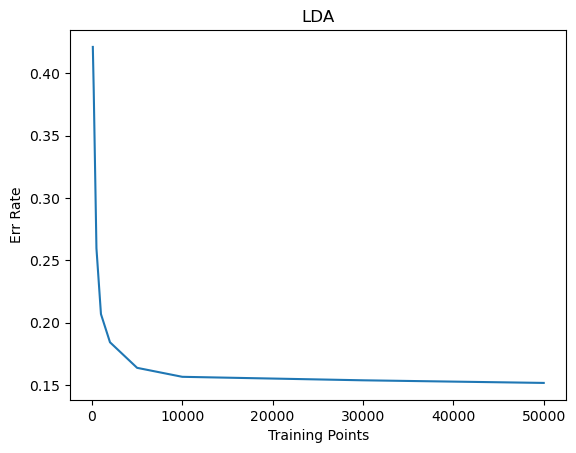

In [53]:
print("Err Rate: ", err_rates)
plot.plot(train_size, err_rates)
plot.xlabel('Training Points')
plot.ylabel('Err Rate')
plot.title('LDA')
plot.show()

In [54]:
#Question 8 QDA Working
data_npz = np.load('data/mnist-data-hw3.npz')
train_data = data_npz['training_data']
train_labels = data_npz['training_labels']

mean_dict = {}
cov_dict = {}

for j in range(10):
    num_data = train_data[train_labels == j]
    l2 = np.linalg.norm(num_data, axis=1) + 0.0001
    num_data = num_data / l2[:, np.newaxis]
    num_data = num_data.reshape(num_data.shape[0], -1)
    mean_dict[j] = np.mean(num_data, axis=0)
    cov_dict[j] = np.cov(num_data, rowvar=False)
    
mean_mat = np.array(list(mean_dict.values())).T
p_cov = np.mean(list(cov_dict.values()), axis=0)
p_cov += 0.000001 * np.eye(p_cov.shape[0])

class_prior = np.array([np.mean(train_labels == i) for i in range(0,10)])

val_indicies = np.random.choice(len(train_data), size=10000, replace=False)
val_data = train_data[val_indicies]
val_label = train_labels[val_indicies]

err_rates = []
for j in train_size:
    sub_indicies = np.random.choice(len(train_data), size=j, replace=False)
    sub_data = train_data[sub_indicies]
    sub_label = train_labels[sub_indicies]
    sub_mean_mat = np.array([np.mean(sub_data[sub_label == i], axis=0) for i in range(0,10)]).T
    
    sub_cov = []
    for i in range(0,10):
        data_label = sub_data[sub_label == i]
        if data_label.ndim == 2:
            sub_cov.append(np.cov(data_label, rowvar=False))
        else:
            sub_cov.append(p_cov)
    
    sub_cov = np.array(sub_cov)
    sub_inv_cov = [np.linalg.inv(cov + 0.00000001 * np.eye(cov.shape[0])) for cov in sub_cov]
    sub_val_predict = qda(val_data, sub_mean_mat, sub_inv_cov, class_prior)
    sub_err_rate = 1 - np.sum(sub_val_predict == val_label) / len(val_label)
    err_rates.append(sub_err_rate)

Validation Error Rate: [0.5278, 0.4112, 0.26170000000000004, 0.21299999999999997, 0.18189999999999995, 0.1664, 0.15849999999999997, 0.15569999999999995, 0.15459999999999996]


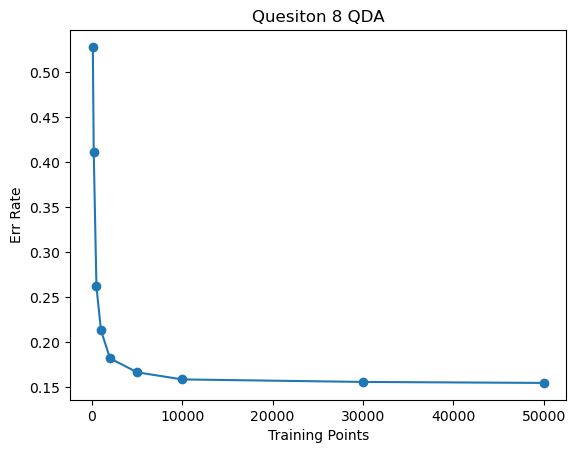

In [55]:
print(f'Validation Error Rate: {err_rates}')
plot.plot(train_size, err_rates, marker='o')
plot.xlabel('Training Points')
plot.ylabel('Err Rate')
plot.title('Quesiton 8 QDA')
plot.show()

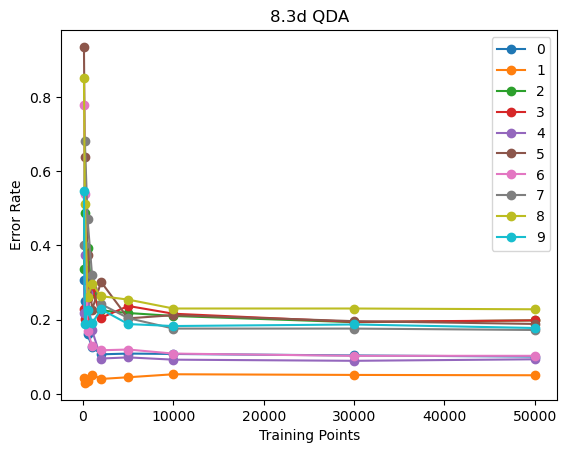

In [10]:
#Question 8.3d QDA
train = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
err_rate = []
err_rate_digit = {i: [] for i in range(0,10)}

for i in train:
    sub_indicies = np.random.choice(len(train_data), size=i, replace=False)
    sub_data = train_data[sub_indicies]
    sub_label = train_labels[sub_indicies]
    sub_mean_mat = np.array([np.mean(sub_data[sub_label == i], axis=0) for i in range(0,10)]).T
    
    sub_cov = []
    for j in range(0,10):
        data_label = sub_data[sub_label == j]
        if data_label.ndim == 2:
            sub_cov.append(np.cov(data_label, rowvar=False))
        else:
            sub_cov.append(p_cov)
    
    sub_cov = np.array(sub_cov)
    sub_inv_cov = [np.linalg.inv(cov + 0.000001 * np.eye(cov.shape[0])) for cov in sub_cov]
    sub_val_predict = qda(val_data, sub_mean_mat, sub_inv_cov, class_prior)
    
    for i in range(0,10):
        digit_indices = np.where(val_label == i)
        digit_predict = sub_val_predict[digit_indices]
        digit_label = val_label[digit_indices]
        digit_err = 1 - np.sum(digit_predict == digit_label) / len(digit_label)
        err_rate_digit[i].append(digit_err)

for i in range(0,10):
    plot.plot(train, err_rate_digit[i], marker='o', label=i)

plot.xlabel('Training Points')
plot.ylabel('Error Rate')
plot.title('8.3d QDA')
plot.legend()
plot.show()

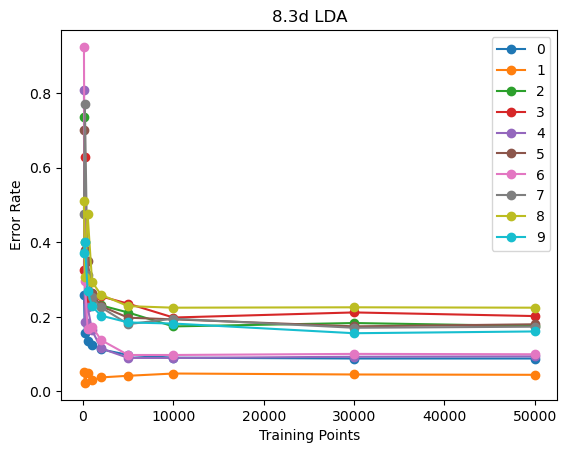

In [43]:
#Question 8.3d LDA
data_npz = np.load('data/mnist-data-hw3.npz')
train_data = data_npz['training_data']
train_labels = data_npz['training_labels']

mean_dict = {}
cov_dict = {}

for j in range(10):
    num_data = train_data[train_labels == j]
    l2 = np.linalg.norm(num_data, axis=1) + 0.0001
    num_data = num_data / l2[:, np.newaxis]
    num_data = num_data.reshape(num_data.shape[0], -1)
    mean_dict[j] = np.mean(num_data, axis=0)
    cov_dict[j] = np.cov(num_data, rowvar=False)
    
mean_mat = np.array(list(mean_dict.values())).T
p_cov = np.mean(list(cov_dict.values()), axis=0)
smalladd = 1e-5
p_cov += smalladd * np.eye(p_cov.shape[0])
inv_p_cov = np.linalg.inv(p_cov)

class_prior = np.array([np.mean(train_labels == i) for i in range(0,10)])

val_indicies = np.random.choice(len(train_data), size=10000, replace=False)
val_data = train_data[val_indicies]
val_label = train_labels[val_indicies]
val_predict = lda(val_data, mean_mat, inv_p_cov, class_prior)
error = 1 - np.sum(val_predict == val_label) / len(val_label)

error_rates = []
err_rate_digit = {i: [] for i in range(0,10)}

train_size = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
for i in train_size:
    sub_indices = np.random.choice(len(train_data), size=i, replace=False)
    sub_data = train_data[sub_indices]
    sub_label = train_labels[sub_indices]
    sub_mean_mat = np.array([np.mean(sub_data[sub_label == i], axis=0) for i in range(0,10)]).T
    
    sub_cov = []
    for j in range(0,10):
        data_label = sub_data[sub_label == j]
        if data_label.ndim == 2:
            sub_cov.append(np.cov(data_label, rowvar=False))
        else:
            sub_cov.append(p_cov)
    
    sub_cov_mat = np.array(sub_cov)
    sub_p_cov = np.linalg.inv(np.mean(sub_cov_mat, axis=0) + smalladd * np.eye(sub_cov_mat.shape[1]))
    sub_val_predict = lda(val_data, sub_mean_mat, sub_inv_p_cov, class_prior)

    for j in range(0,10):
        digit_mask = val_label == j
        digit_error = 1 - np.sum(sub_val_predict[digit_mask] == val_label[digit_mask]) / np.sum(digit_mask)
        err_rate_digit[j].append(digit_error)


for i in range(0,10):
    plot.plot(train_size, err_rate_digit[i], marker='o', label=i)

plot.xlabel('Training Points')
plot.ylabel('Error Rate')
plot.title('8.3d LDA')
plot.legend()
plot.show()

In [44]:
#Question 8.4
data_npz = np.load('data/mnist-data-hw3.npz')
train_data = data_npz['training_data']
train_labels = data_npz['training_labels']

test_data = data_npz['test_data']

mean_dict = {}
cov_dict = {}

for j in range(10):
    num_data = train_data[train_labels == j]
    l2 = np.linalg.norm(num_data, axis=1) + 0.0001
    num_data = num_data / l2[:, np.newaxis]
    num_data = num_data.reshape(num_data.shape[0], -1)
    mean_dict[j] = np.mean(num_data, axis=0)
    cov_dict[j] = np.cov(num_data, rowvar=False)
    
mean_mat = np.array(list(mean_dict.values())).T
p_cov = np.mean(list(cov_dict.values()), axis=0)
smalladd = 1e-5
p_cov += smalladd * np.eye(p_cov.shape[0])
inv_p_cov = np.linalg.inv(p_cov)

class_prior = np.array([np.mean(train_labels == label) for label in range(10)])

error_rates = []

train_size = [50000]
for i in train_size:
    sub_indicies = np.random.choice(len(train_data), size=i, replace=False)
    sub_data = train_data[sub_indicies]
    sub_label = train_labels[sub_indicies]
    sub_mean_mat = np.array([np.mean(sub_data[sub_label == i], axis=0) for i in range(0,10)]).T
    
    sub_cov = []
    for j in range(0,10):
        data_label = sub_data[sub_label == j]
        if data_label.ndim == 2:
            sub_cov.append(np.cov(data_label, rowvar=False))
        else:
            sub_cov.append(p_cov)
    
    sub_cov = np.array(sub_cov)
    sub_p_cov = np.mean(sub_cov, axis=0) + smalladd * np.eye(sub_cov.shape[1])
    sub_inv_p_cov = np.linalg.inv(sub_p_cov)
    sub_val_predict = lda(val_data, sub_mean_mat, sub_inv_p_cov, class_prior)

    sub_err_rate = 1 - np.sum(sub_val_predict == val_label) / len(val_label)
    error_rates.append(sub_err_rate)

results_to_csv(lda(test_data, sub_mean_mat, sub_inv_p_cov, class_prior))

In [46]:
data_npz = np.load('data/spam-data-hw3.npz')
train_data = data_npz['training_data']
train_labels = data_npz['training_labels']

test_data = data_npz['test_data']

class_prior = np.array([np.mean(train_labels == i) for i in range(0,10)])
mean_dict = {}
cov_dict = {}

for j in range(0,1):
    num_data = train_data[train_labels == j]
    l2 = np.linalg.norm(num_data, axis=1) + 0.0001
    num_data = num_data / l2[:, np.newaxis]
    num_data = num_data.reshape(num_data.shape[0], -1)
    mean_dict[j] = np.mean(num_data, axis=0)
    cov_dict[j] = np.cov(num_data, rowvar=False)
    
mean_mat = np.array(list(mean_dict.values())).T
p_cov = np.mean(list(cov_dict.values()), axis=0)
smalladd = 0.000001
p_cov += smalladd * np.eye(p_cov.shape[0])
inv_p_cov = np.linalg.inv(p_cov)
error_rates = []

sub_data = train_data
sub_label = train_labels
sub_mean_mat = np.array([np.mean(sub_data[sub_label == i], axis=0) for i in range(0,1)]).T

sub_cov = []
for j in range(0,1):
    data_label = sub_data[sub_label == j]
    if data_label.ndim == 2 and data_label.shape[0] > 1:
        sub_cov.append(np.cov(data_label, rowvar=False))
    else:
        sub_cov.append(p_cov)

sub_cov = np.array(sub_cov)
sub_p_cov = np.mean(sub_cov, axis=0) + 0.00001 * np.eye(sub_cov.shape[1])
sub_inv_p_cov = np.linalg.inv(sub_p_cov)

results_to_csv(lda(test_data, sub_mean_mat, sub_inv_p_cov, class_prior))